<h1 align = center style="color:black;font-family: Arial; font-size:40px;">Kaggle Survey 2022 insights</h1>

<h1> About Project</h1> <br>In 'Kaggle survey 2022 Insights', complete analysis of results of survey has been performed which was conducted by Kaggle (Most popular data science resources and projects community or platform)
) around the world.The survey was live from 09/16/2022 to 10/16/2022, and after cleaning the data by kaggle we are provided  with 23,997 responses in a csv format file i.e. <b>kaggle_survey_2022_responses.csv</b><br>




<h1>Import required Libraries</h1>

In the very first step, we will import required libraries such as numpy, pandas and sqllite3. We will install and import other libraries 
as per our requirements along the analysis process.

In [284]:
!pip install pycountry-convert
!pip install wordcloud 
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import pandas as pd 
import sqlite3
# %matplotlib notebook          #for interactive figures
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import mean
import math
import seaborn as sns
from collections import Counter 
import matplotlib.style as style 
!pip install geopy
from geopy.geocoders import Nominatim
import plotly.express as px
import plotly.graph_objects as go
style.use('ggplot')

In [281]:
# to display all figures in center of the notebook

from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

After installing and importing required libraries , we will start pre-processing of data that includes <b> Data Mining (in our case, we are just reading data from sql databse),Data Cleaning, Data wrangling(formatting data)</b>

# Data Reading

connect to Sql Database file "kaggle_survey_databse.db"

In [107]:
conn = sqlite3.connect("kaggle_survey_databse.db")
print("connected")

connected


Write a query to select data from database table 

In [183]:
Query ="""Select * from kaggle_survey_2022_responses1"""

Read a database table data (kaggle responses for survey 2022) in a pandas dataframe

In [200]:
df = pd.read_sql(Query, conn)


Check the dataframe by showing first five rows of dataframe

In [201]:
df.head()

,Duration(inseconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,462,30-34,Man,Algeria,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,293,18-21,Man,Egypt,Yes,Coursera,edX,None,DataCamp,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",None,None,None,None,None
4,851,55-59,Man,France,No,Coursera,None,Kaggle Learn Courses,None,None,...,None,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",None,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None


# Data Cleaning and Formatting

Now, we need to perform some dtaa cleaning and formatting on data .

In [202]:
kaggle_df = df.copy()      #copy of dataframe "df" to "kaggle_df"
kaggle_df.head()

,Duration(inseconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, uni...",On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,On which platforms have you begun or completed...,...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...,Who/what are your favorite media sources that ...
1,121,30-34,Man,India,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,462,30-34,Man,Algeria,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,293,18-21,Man,Egypt,Yes,Coursera,edX,None,DataCamp,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",None,None,None,None,None
4,851,55-59,Man,France,No,Coursera,None,Kaggle Learn Courses,None,None,...,None,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",None,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None


We need to change column names. Here we are changing column names to first row and resetting the index of dataframe.

In [203]:
kaggle_df.columns = df.iloc[0]         #change column names to the first row of dataframe at index 0
kaggle_df.drop(0,inplace = True)       # drop the first row and reset index
kaggle_df.reset_index(drop=True, inplace=True)

In [204]:
kaggle_df.head()   #new dataframe first 5 rows

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,"Are you currently a student? (high school, university, or graduate)",On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - edX,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Kaggle Learn Courses,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - DataCamp,On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Fast.ai,...,"Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Reddit (r/machinelearning, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Kaggle (notebooks, forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Course Forums (forums.fast.ai, Coursera forums, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - YouTube (Kaggle YouTube, Cloud AI Adventures, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Podcasts (Chai Time Data Science, O’Reilly Data Show, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Blogs (Towards Data Science, Analytics Vidhya, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Journal Publications (peer-reviewed journals, conference proceedings, etc)","Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Slack Communities (ods.ai, kagglenoobs, etc)",Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - None,Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Other
0,121,30-34,Man,India,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,462,30-34,Man,Algeria,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,293,18-21,Man,Egypt,Yes,Coursera,edX,None,DataCamp,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",None,None,None,None,None
3,851,55-59,Man,France,No,Coursera,None,Kaggle Learn Courses,None,None,...,None,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",None,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None
4,232,45-49,Man,India,Yes,None,None,None,None,None,...,None,None,None,None,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None


# #Column Formatting

After reading , as we can see we don't have any valid column names for our data. So now, we will rename our dataframe "dfnew"'s column names. 
I have created a excel workbook named "column_rename" with complete question asked in survey and column names for those questions.

lets first read the excel file and see the data inside the dataframe using pandas library.

In [205]:
df_colname = pd.read_excel('column_rename.xlsx')
df_colname

,Questions,Column names
0,Duration (in seconds),duration(sec)
1,What is your age (# years)?,age
2,What is your gender? - Selected Choice,gender
3,In which country do you currently reside?,current_residential_country
4,"Are you currently a student? (high school, uni...",student_yes__no
...,...,...
291,Who/what are your favorite media sources that ...,fav_media_blogs
292,Who/what are your favorite media sources that ...,fav_media_journal
293,Who/what are your favorite media sources that ...,fav_media_slack
294,Who/what are your favorite media sources that ...,fav_media_none


As we can see from the above dataframe that we have two fields in dataframe "Questions" and "column names". Now we will set the values of "colulmn names" field to values of dataframe column labels.

In [206]:
kaggle_df.columns = df_colname['Column names']
kaggle_df

Column names,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_reddit,fav_media_kaggle,fav_media_course_forums,fav_media_youtube,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other
0,121,30-34,Man,India,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,462,30-34,Man,Algeria,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,293,18-21,Man,Egypt,Yes,Coursera,edX,None,DataCamp,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",None,None,None,None,None
3,851,55-59,Man,France,No,Coursera,None,Kaggle Learn Courses,None,None,...,None,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",None,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None
4,232,45-49,Man,India,Yes,None,None,None,None,None,...,None,None,None,None,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,Man,United States of America,Yes,None,None,None,None,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",None,"Journal Publications (peer-reviewed journals, ...",None,None,None
23993,330,60-69,Man,United States of America,Yes,None,None,None,None,None,...,None,None,None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",None,None,None,None,None,None
23994,860,25-29,Man,Turkey,No,None,None,None,DataCamp,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",None,None,None,None,None,None
23995,597,35-39,Woman,Israel,No,None,None,Kaggle Learn Courses,None,None,...,None,None,None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",None,None,None,None,None,None


So after renaming column names, our data looks much better and more accessible. But there is one problem, as we renamed the column names
from all the values of oure dataframe "df_columnnames", it includes header"Column names" also. And we don't want that into our datarame so lets remove that.

In [207]:
kaggle_df.columns.name =None   #set column names to "None"

Now, check the updated dataframe.

In [208]:
kaggle_df

,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_reddit,fav_media_kaggle,fav_media_course_forums,fav_media_youtube,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other
0,121,30-34,Man,India,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,462,30-34,Man,Algeria,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,293,18-21,Man,Egypt,Yes,Coursera,edX,None,DataCamp,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",None,None,None,None,None
3,851,55-59,Man,France,No,Coursera,None,Kaggle Learn Courses,None,None,...,None,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",None,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None
4,232,45-49,Man,India,Yes,None,None,None,None,None,...,None,None,None,None,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,Man,United States of America,Yes,None,None,None,None,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",None,"Journal Publications (peer-reviewed journals, ...",None,None,None
23993,330,60-69,Man,United States of America,Yes,None,None,None,None,None,...,None,None,None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",None,None,None,None,None,None
23994,860,25-29,Man,Turkey,No,None,None,None,DataCamp,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",None,None,None,None,None,None
23995,597,35-39,Woman,Israel,No,None,None,Kaggle Learn Courses,None,None,...,None,None,None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",None,None,None,None,None,None


# # missing and duplicate values

It looks good now. In the next step, we will look for any missing values in our dataframe.

In [209]:
kaggle_df.isnull().sum()    #sum of missing values for all columns

duration(sec)                      0
age                                0
gender                             0
current_residential_country        0
student_yes__no                    0
                               ...  
fav_media_blogs                16231
fav_media_journal              20193
fav_media_slack                22271
fav_media_none                 22729
fav_media_other                23162
Length: 296, dtype: int64

In [120]:
kaggle_df[kaggle_df.isnull().any(axis=1)]   #show NaN values in dataframe 

,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_reddit,fav_media_kaggle,fav_media_course_forums,fav_media_youtube,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other
0,121,30-34,Man,India,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,462,30-34,Man,Algeria,No,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,293,18-21,Man,Egypt,Yes,Coursera,edX,None,DataCamp,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",None,None,None,None,None
3,851,55-59,Man,France,No,Coursera,None,Kaggle Learn Courses,None,None,...,None,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",None,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None
4,232,45-49,Man,India,Yes,None,None,None,None,None,...,None,None,None,None,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,Man,United States of America,Yes,None,None,None,None,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",None,"Journal Publications (peer-reviewed journals, ...",None,None,None
23993,330,60-69,Man,United States of America,Yes,None,None,None,None,None,...,None,None,None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",None,None,None,None,None,None
23994,860,25-29,Man,Turkey,No,None,None,None,DataCamp,None,...,None,"Kaggle (notebooks, forums, etc)",None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",None,None,None,None,None,None
23995,597,35-39,Woman,Israel,No,None,None,Kaggle Learn Courses,None,None,...,None,None,None,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",None,None,None,None,None,None


As per above dataframe, we can see some null values in dataframe, but those values are all catregorical values as our survey options are selection based for respondents and as per kaggle, although all duplicates and spam values were already deleted from the dataset but let's make sure that no duplicate values are present in our dataset

In [210]:
kaggle_df[kaggle_df.duplicated()]

,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_reddit,fav_media_kaggle,fav_media_course_forums,fav_media_youtube,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other
10014,162,18-21,Man,India,Yes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


oh wow!! we got one unexpected duplicate here. So let's delete this row from our dataset to avaoid any further duscreencies in our analysis.

In [211]:
kaggle_df.drop_duplicates(inplace=True)

let's check again for duplicated after deleting.

In [212]:
kaggle_df[kaggle_df.duplicated()]

,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_reddit,fav_media_kaggle,fav_media_course_forums,fav_media_youtube,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other


So yes, Now there are no duplicate rows in our dataset.

# #invalid data

Now, we need to look for any invalid values in our dataset. Invalid values can cause critical errors in our final analysis.To find 
invalid values, first we need to look for numeric or quantative columns. 

--lets check the dat types of columns in dataset

In [213]:
kaggle_df.dtypes

duration(sec)                  object
age                            object
gender                         object
current_residential_country    object
student_yes__no                object
                                ...  
fav_media_blogs                object
fav_media_journal              object
fav_media_slack                object
fav_media_none                 object
fav_media_other                object
Length: 296, dtype: object

As can see, all columns are for datatype object that is maily string values. But after carefully reading dataset, there are three columns available in dataset "duration(sec)" "yearly_income" and "money_spent" that contain all numeric values so there datatype should be integer or float.
The main reason that why we need to change the data types because on string values we can not perforom mathematical formulas and calculations.

So, Let's change the data type of columns "duration(sec)", "yearly_income", "money_spent" from string to numeric.

In [214]:
# kaggle_df[["yearly_income"]].astype(str).astype(float)
kaggle_df['duration(sec)'] = kaggle_df['duration(sec)'].astype('Int64') #convert dtype of "duration(sec)" into int
# kaggle_df['duration(sec)'] = pd.to_datetime(kaggle_df['duration(sec)'])

In [215]:
kaggle_df["duration(sec)"].dtypes   #check data type for "duration(sec)"

Int64Dtype()

In [216]:
kaggle_df[["yearly_income","money_spent"]]

,yearly_income,money_spent
0,None,None
1,None,None
2,None,None
3,"25,000-29,999","$1000-$9,999"
4,None,None
...,...,...
23992,None,None
23993,None,None
23994,"25,000-29,999",$100-$999
23995,"15,000-19,999",$0 ($USD)


As in the above cell, we can see there are values present in range format for yearly_income and money_spent. now we will format these values in two different columns 
so that it would be easy to perform calculations on therse columns.

df.join -- to add new columns to dataframe <br>
str.replace -- to replace comma with nothing in data values  <br>
str.extract -- to truncate "$" and "-" from data values  <br>
.astype -- to change the datatype of columns  <br>
.rename-- rename the new columns.

In [217]:
for col in ["yearly_income","money_spent"]:
    kaggle_df = kaggle_df.join(
        kaggle_df[col]
        .str.replace(",", "", regex=False)
        .str.extract(pat=r"^[$]*(\d+)[-\s$]*(\d+)$")
        .astype("float")
        .rename({0: f"{col}_lower", 1: f"{col}_upper"}, axis="columns")
    )

In [218]:
kaggle_df     #dataset after new columns 

,duration(sec),age,gender,current_residential_country,student_yes__no,ds_platform_coursera,ds_platform_edX,ds_platform_kaggle_learn_courses,ds_platform_datacamp,ds_platfor_fast.ai,...,fav_media_podcasts,fav_media_blogs,fav_media_journal,fav_media_slack,fav_media_none,fav_media_other,yearly_income_lower,yearly_income_upper,money_spent_lower,money_spent_upper
0,121,30-34,Man,India,No,None,None,None,None,None,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
1,462,30-34,Man,Algeria,No,None,None,None,None,None,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
2,293,18-21,Man,Egypt,Yes,Coursera,edX,None,DataCamp,None,...,"Podcasts (Chai Time Data Science, O’Reilly Dat...",None,None,None,None,None,NaN,NaN,NaN,NaN
3,851,55-59,Man,France,No,Coursera,None,Kaggle Learn Courses,None,None,...,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None,25000.0,29999.0,1000.0,9999.0
4,232,45-49,Man,India,Yes,None,None,None,None,None,...,None,"Blogs (Towards Data Science, Analytics Vidhya,...",None,None,None,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23992,331,22-24,Man,United States of America,Yes,None,None,None,None,None,...,"Podcasts (Chai Time Data Science, O’Reilly Dat...",None,"Journal Publications (peer-reviewed journals, ...",None,None,None,NaN,NaN,NaN,NaN
23993,330,60-69,Man,United States of America,Yes,None,None,None,None,None,...,None,None,None,None,None,None,NaN,NaN,NaN,NaN
23994,860,25-29,Man,Turkey,No,None,None,None,DataCamp,None,...,None,None,None,None,None,None,25000.0,29999.0,100.0,999.0
23995,597,35-39,Woman,Israel,No,None,None,Kaggle Learn Courses,None,None,...,None,None,None,None,None,None,15000.0,19999.0,NaN,NaN


## -- Check if there are any negative values in dataset

In [219]:
numcol = kaggle_df.select_dtypes(include=['float64','int64']).columns
lt=list()
for i in numcol:
    y=any(x < 0 for x in kaggle_df[i])
    if y==True:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))

There are 0 negative values in the data frame.


So this is good, that we don't have any negative values in our dataset.

Now, our Data cleaning is done let's see some more info about our dataset for kaggle survey using describe , info methods of pandas.

In [220]:
kaggle_df.describe()

,duration(sec),yearly_income_lower,yearly_income_upper,money_spent_lower,money_spent_upper
count,2.399600e+04,8113.000000,8113.000000,5476.000000,5476.000000
mean,1.009051e+04,46454.948848,61092.491927,1183.025749,11853.072316
std,1.115426e+05,66977.644350,105637.239226,2763.950785,27629.348036
min,1.200000e+02,0.000000,999.000000,1.000000,99.000000
25%,2.640000e+02,3000.000000,3999.000000,1.000000,99.000000
50%,4.140000e+02,20000.000000,24999.000000,100.000000,999.000000
75%,7.150000e+02,70000.000000,79999.000000,1000.000000,9999.000000
max,2.533678e+06,500000.000000,999999.000000,10000.000000,99999.000000


In [25]:
kaggle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23996 entries, 0 to 23996
Columns: 300 entries, duration(sec) to money_spent_upper
dtypes: Int64(1), float64(4), object(295)
memory usage: 55.6+ MB


### shape of final dataframe (No.of rows and columns)

In [221]:
original_shape = df.shape
modified_shape = kaggle_df.shape
print(f'There are {modified_shape[0]} rows out of original {original_shape[0]} rows and {modified_shape[1]} columns out of  {original_shape[1]} columns in kaggle survey 2022 dataset')


There are 23996 rows out of original 23998 rows and 300 columns out of  296 columns in kaggle survey 2022 dataset


<span style="color:red">Note</span> -- so just don't get confuse here about how 2 rows were deleted. Recall, in last steps from column formatting we deleted one row and other one we deleted for row duplication.

Before visualization process, let's define some color palletes using seaborn :

In [91]:
# color palletes to use in different visuals 
colors_muted = sns.color_palette('muted')[0:5]
colors_pastel = sns.color_palette('pastel')[0:5]
colors_bright = sns.color_palette('bright')[0:5]
colors_hls = sns.color_palette("hls", 8)
colors_paired = sns.color_palette("Paired")


# EDA(Exploratory Data Analysis)

In EDA, here we will perform <b>Descriptive analysis</b> where we will find some interesting fact about survey data.

<b>Q1- Maximum, minimum and average time duration for survey<b>

In [287]:
max_duration = kaggle_df["duration(sec)"].max()   #maximum survey response time
min_duration = kaggle_df["duration(sec)"].min()     #minimum urvey response time
avg_duration = kaggle_df["duration(sec)"].mean()    #average survey response time

print(f'Maximum time taken by repondents for survey is {max_duration} sec and minimum time is {min_duration} sec')
print(f'Average time for survey response is {round(avg_duration,2)} sec')


Maximum time taken by repondents for survey is 2533678 sec and minimum time is 120 sec
Average time for survey response is 10090.51 sec


In [285]:
def convert(seconds):
    min, sec = divmod(seconds, 60)
    hour, min = divmod(min, 60)
    return '%d:%02d:%02d' % (hour, min, sec)

In [288]:
convert(avg_duration)

'2:48:10'

So, Average time taken by Responders for survey is "Two Hours and fourty eight minutes (2hours 48 minutes)"

<b> Q2 - No. of Respondents by age group </b>

In [94]:
age_respondents = kaggle_df["age"].value_counts()

Now, let's create a plot for the above observation using matplotlib library

Text(0.5, 1.0, 'No. of Respondents by Age Group ')

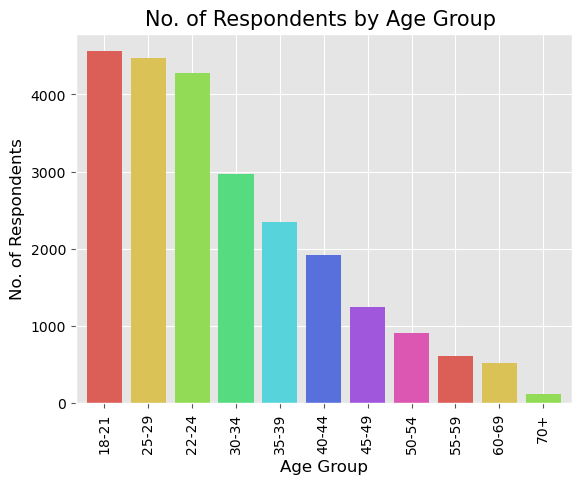

In [95]:
age_respondents.plot(kind = 'bar',color= colors_hls,  width = 0.8 )
plt.xlabel("Age Group", color = 'black')
plt.ylabel("No. of Respondents", color = 'black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.title("No. of Respondents by Age Group ", fontsize = 15)


<b>Q3 - Respondents By Gender ratio </b>

In [289]:
gender_respondents = kaggle_df["gender"].value_counts()
gender_respondents

Man                        18265
Woman                       5286
Prefer not to say            334
Nonbinary                     78
Prefer to self-describe       33
Name: gender, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_8528\3555633813.py:8: UserWarning:

You have mixed positional and keyword arguments, some input may be discarded.



Text(0.5, 1.0, 'Respondents By Gender')

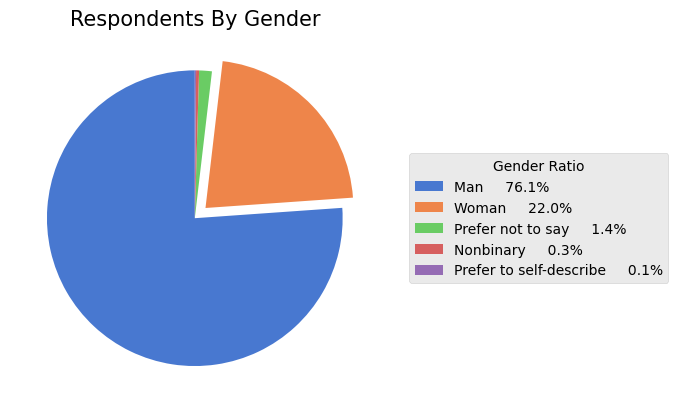

In [290]:
gender = ['Man', 'Woman', 'Prefer not to say','Nonbinary', 'Prefer to self-describe']
size = list()
for i in gender_respondents.values:
    pct =  i/gender_respondents.values.sum()*100
    size.append(pct)
plt.pie(size, colors = colors_muted, startangle = 90,explode = (0,0.1,0,0,0))
labels = [f'{l}     {s:0.1f}%' for l, s in zip(gender, size)]
plt.legend(gender, title = "Gender Ratio", loc = "center right", bbox_to_anchor =(1.3, 0, 0.5, 1), labels = labels)
plt.title("Respondents By Gender", fontsize= 15)

As we can see from Pie Chart, Maximun number of people who respond in survey were Men and there is large difference between 
the ratio of men and woman respondents. 

Now let's try to visualize only Men vs Women ratio

dict_values([18265, 5286])


Text(0.5, 1.0, 'Man vs Woman Responders')

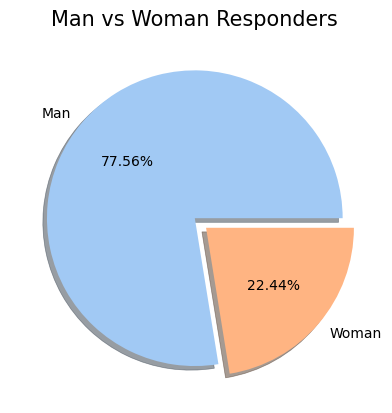

In [291]:
men_women = list()
for i in kaggle_df["gender"]:
    if i == "Man" or i =="Woman":
        men_women.append(i)
men_women_count = Counter(men_women).values()         #"Counter() from "collection" module to count occurences of each values i.e. "Man" and "woman"

print(men_women_count)

# plot a pie chart for men vs women respondent ratio
label = ["Man", "Woman"]
plt.pie(men_women_count, autopct = '%.2f%%', labels = label, colors = colors_pastel, explode = (0, 0.1),shadow = True) 
plt.title("Man vs Woman Responders", fontsize= 15)

<b> Q4-No. of Respondents By country</b>

To find the no. of survey responders, let's extract value counts for each country from kaggle dataframe

In [28]:
country_responder = pd.DataFrame(kaggle_df["current_residential_country"].value_counts())
country_count = country_responder.reset_index()
# country_count.columns
country_count.columns = ['country', 'count']
country_count

,country,count
0,India,8791
1,United States of America,2920
2,Other,1430
3,Brazil,833
4,Nigeria,731
5,Pakistan,620
6,Japan,556
7,China,453
8,Egypt,383
9,Mexico,380


Text(0, 0.5, 'Country')

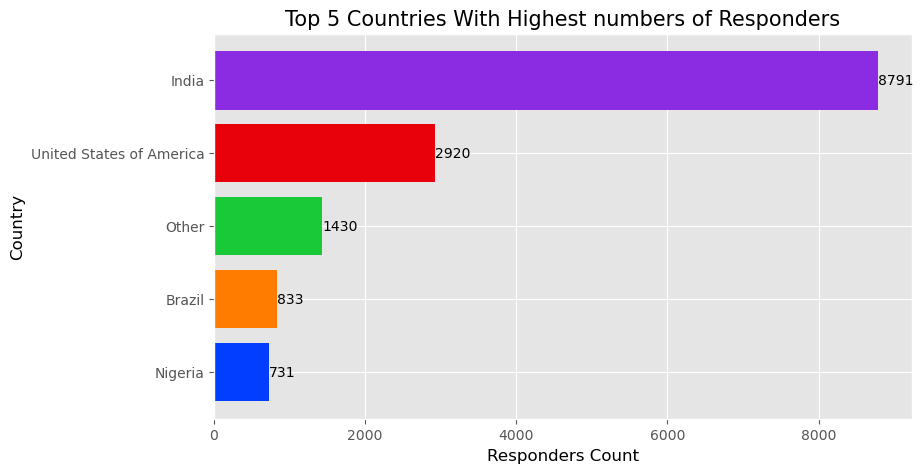

In [92]:
top5_country = country_count.head(5).sort_values('count',ascending = True)
fig,ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(9)
bars = ax.barh(top5_country['country'],top5_country['count'],  color = colors_bright)
ax.bar_label(bars, color='black')
plt.title('Top 5 Countries With Highest numbers of Responders', fontsize = 15)
plt.xlabel('Responders Count', color = 'black')
plt.ylabel('Country', color = 'black')

In [ ]:
#function to convert to alpah2 country codes
from pycountry_convert import  country_name_to_country_alpha2
 
def get_alpha(col,cn_a2_code):
    for i in col:
        try:
            cn_a2_code.append(country_name_to_country_alpha2(i))
        except:
             cn_a2_code.append('Unknown')
    return (cn_a2_code)


In [ ]:
country_code=list()
country_code_a2 = get_alpha(country_count['country'],country_code)
country_count['code_alpha2'] = country_code_a2
country_count

Now let's find the latitude and longitude of countries using python's geopy.

In [89]:
#function to get longitude and latitude data from country name
geolocator = Nominatim(user_agent="kaggle_insights")

def geolocate(country,long_list,lat_list):
    for i in country:
        try:
        # Geolocate the center of the country
            loc = geolocator.geocode(i)
        # And return latitude and longitude
            long_list.append(loc.longitude)
            lat_list.append(loc.latitude)
           
        except:
        # Return missing value
             long_list.append(np.nan)
             lat_list.append(np.nan)
    return ( long_list, lat_list)

<b><span style = "color:red">Note - </span> Passing a user agent in Nominatim() is important otherwise it will throw configuration error. setting User agent to your application name helps geopy to limit the number of requests per application.

In [90]:
country_long = list()
country_lat = list()
latitude,longitude = geolocate(country_count['country'],country_long,country_lat)
latitude
country_count['latitude'],country_count['longitude'] = [latitude, longitude]
country_count

,country,count,latitude,longitude
0,India,8791,78.667743,22.351115
1,United States of America,2920,-100.445882,39.783730
2,Other,1430,-77.343789,18.410652
3,Brazil,833,-53.200000,-10.333333
4,Nigeria,731,7.999972,9.600036
5,Pakistan,620,71.247499,30.330840
6,Japan,556,139.239418,36.574844
7,China,453,104.999927,35.000074
8,Egypt,383,29.267547,26.254049
9,Mexico,380,-102.007710,23.658512


After this step, we can see there are 'Nan ' value in last row. we can drop this row because it might raise error during map visualization.

In [30]:
country_count.drop(labels = 57,axis = 0 , inplace = True)


In [31]:
country  = country_count.copy()

In [32]:
country.drop(labels  = [2,30,50],inplace=True)
country

,country,count
0,India,8791
1,United States of America,2920
3,Brazil,833
4,Nigeria,731
5,Pakistan,620
6,Japan,556
7,China,453
8,Egypt,383
9,Mexico,380
10,Indonesia,376


In [282]:
fig = px.choropleth(country, locations='country',
                    color="count", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    locationmode='country names',
                    color_continuous_scale=px.colors.sequential.Plasma 
                    )

fig.update_layout(title_text="No.of Responders per Country",title_x=0.5, title_font_color="black",title_font_size = 28,
                  legend_title_text= "No. of Responders",
                 coloraxis_colorbar=dict(
                 title="No. of Responders")
                 )
fig.update_geos(
    visible=False
)
fig.show()

<b> India</b> has the largest no. of survey responders by exceeding count of <b> USA</b> Responders

<b> Q5-Popularity of Online Platforms To learn Data Science</b>

Let's Define a function to get value counts of multiple columns in a dataframe. 

In [81]:
def cols_count(count_col, count_list, name, usage):
    for i in count_col:
        count = kaggle_df[i].value_counts()
        count_list.append(count)
    
    for i in count_list:
        name.append(i.keys().tolist()[0])
        usage.append(i.values.tolist()[0])

    return name,usage

Now let's count the values for online platforms using above method.

In [292]:
platforms = kaggle_df[['ds_platform_coursera',
'ds_platform_edX',
'ds_platform_kaggle_learn_courses',
'ds_platform_datacamp',
'ds_platfor_fast.ai',
'ds_platform_udacity', 
'ds_platform_udemy',
'ds_platform_linkedin_learning',
'ds_platform_cloud-certification_programs',
'ds_platform_university_courses',
'ds_platform_none',
'ds_platform_other']
]

platform_count = [] 
platform_name= []
platform_usage = []  #dictionary initialize



cols_count(platforms,platform_count,platform_name,platform_usage)  #use cols_count method

# create a dataframe of observed values

online_platforms = pd.DataFrame( platform_usage, platform_name)
online_platforms.reset_index(inplace =True)
online_platforms.columns = ['platform_name', 'usage']
online_platforms

,platform_name,usage
0,Coursera,9699
1,edX,2474
2,Kaggle Learn Courses,6628
3,DataCamp,3718
4,Fast.ai,944
5,Udacity,2199
6,Udemy,6115
7,LinkedIn Learning,2766
8,"Cloud-certification programs (direct from AWS,...",1821
9,University Courses (resulting in a university ...,6780


As above, we have created a datafraame from different columns of kaggle_df to get the count of each online platform. It seems good. But there
is one problem as we have less precise labels for "Cloud- certifications" and 'university-courses'. we will change that:

In [293]:
online_platforms.iloc[[8,9],0] = ['cloud certifications','university courses']  #change the values using iloc 
online_platforms

,platform_name,usage
0,Coursera,9699
1,edX,2474
2,Kaggle Learn Courses,6628
3,DataCamp,3718
4,Fast.ai,944
5,Udacity,2199
6,Udemy,6115
7,LinkedIn Learning,2766
8,cloud certifications,1821
9,university courses,6780


Now we can easily visualize the data above in bar chart using seaborn or matplotlib

Text(0.5, 0, 'Course Platforms')

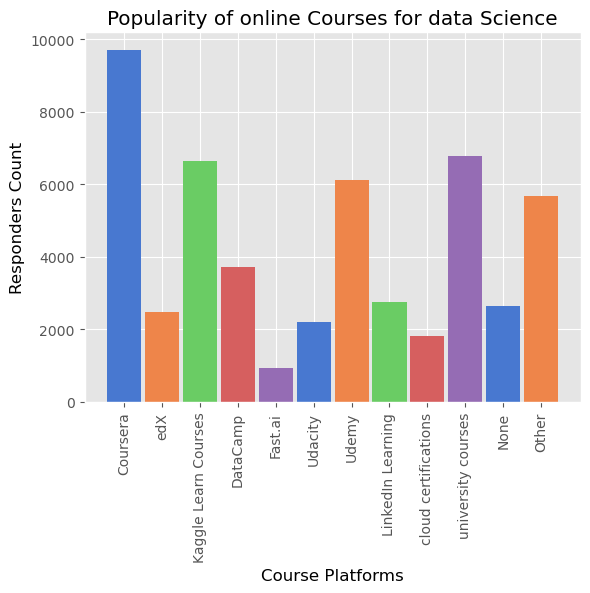

In [294]:
plt.bar(online_platforms['platform_name'],online_platforms['usage'], width=0.9, color = colors_muted)
plt.title('Popularity of online Courses for data Science', color = 'black')
plt.xticks(rotation = 'vertical')
plt.ylabel('Responders Count', color= 'black')
plt.xlabel('Course Platforms', color = 'black')

As from above graph, we found that <b>Coursera</b> is most used platform or most popular among data scientist or developers to learn data 
science following university courses and kaggle learn courses.

<b>Q6-Most Helpful Online Platforms To learn Data Science</b>

In [295]:
platforms_useful = kaggle_df[['ds_helpful_platform_university_courses',
'ds_helpful_platform_online_courses',
'ds_helpful_platform_social_media_platforms',
'ds_helpful_platform_video_platforms',
'ds_helpful_platform_kaggle',
'ds_helpful_platform_none',
'ds_helpful_platform_other',
]
]

platform_count = [] 
platform_name= []
platform_usage = []     #dictionary initialize

cols_count(platforms_useful,platform_count,platform_name,platform_usage)  #use cols_count method

popular_platforms = pd.DataFrame(platform_usage, platform_name)
popular_platforms.reset_index(inplace =True)
popular_platforms.columns = ['platform_name', 'usage']
popular_platforms_sort = popular_platforms.sort_values('usage', ascending = False)
popular_platforms_sort

,platform_name,usage
1,"Online courses (Coursera, EdX, etc)",13714
3,"Video platforms (YouTube, Twitch, etc)",12871
4,"Kaggle (notebooks, competitions, etc)",12700
0,University courses,6851
2,"Social media platforms (Reddit, Twitter, etc)",3310
6,Other,1944
5,None / I do not study data science,1022


[Text(0, 0, '13714'),
 Text(0, 0, '12871'),
 Text(0, 0, '12700'),
 Text(0, 0, '6851'),
 Text(0, 0, '3310'),
 Text(0, 0, '1944'),
 Text(0, 0, '1022')]

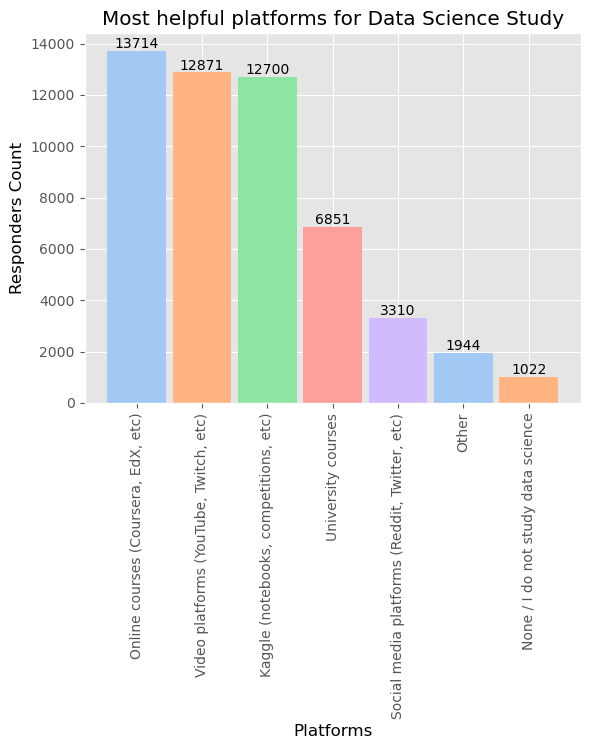

In [296]:

fig, ax = plt.subplots()
bars = ax.bar(popular_platforms_sort['platform_name'],popular_platforms_sort['usage'], width=0.9, color = colors_pastel)
# plt.pie(popular_platforms['usage'], startangle = 90, autopct = '%.2f%%' )
plt.title('Most helpful platforms for Data Science Study', color = 'black')
plt.xticks(rotation ='vertical')
plt.ylabel('Responders Count', color= 'black')
plt.xlabel('Platforms', color = 'black')
ax.bar_label(bars, color='black')

<b>Q7-Education level based on Gender</b>

In [297]:
education_gender = kaggle_df.groupby(['gender','higher_education']).size()
education_gender_df =pd.DataFrame(education_gender)
education_gender_df 

print(education_gender_df.index)


MultiIndex([(                    'Man', ...),
            (                    'Man', ...),
            (                    'Man', ...),
            (                    'Man', ...),
            (                    'Man', ...),
            (                    'Man', ...),
            (                    'Man', ...),
            (              'Nonbinary', ...),
            (              'Nonbinary', ...),
            (              'Nonbinary', ...),
            (              'Nonbinary', ...),
            (              'Nonbinary', ...),
            (              'Nonbinary', ...),
            (      'Prefer not to say', ...),
            (      'Prefer not to say', ...),
            (      'Prefer not to say', ...),
            (      'Prefer not to say', ...),
            (      'Prefer not to say', ...),
            (      'Prefer not to say', ...),
            (      'Prefer not to say', ...),
            ('Prefer to self-describe', ...),
            ('Prefer to self-descr

As we need two column values i.e. 'gender' and 'higher education ' of responders so we have retrieved those and store into dataframe .
But above format of data still need to process because dataframe is mutiindexed and its hard to retrieve values from dataframe. So , let's make
the dataframe single index  using pandas method 'unstack' and droplevel().

In [298]:
ed_gen_df = education_gender_df.unstack(level = 'higher_education')     #unstack the multiindex
ed_gen_df.columns = ed_gen_df.columns.droplevel()                       #drop the level of index
ed_gen_df.columns.name = None
ed_gen_df

,Bachelor’s degree,Doctoral degree,I prefer not to answer,Master’s degree,No formal education past high school,Professional doctorate,Some college/university study without earning a bachelor’s degree
gender,,,,,,,
Man,5895.0,1993.0,965.0,6969.0,472.0,419.0,1109.0
Nonbinary,25.0,5.0,NaN,28.0,2.0,5.0,12.0
Prefer not to say,82.0,36.0,46.0,120.0,9.0,9.0,20.0
Prefer to self-describe,15.0,NaN,4.0,7.0,1.0,4.0,1.0
Woman,1608.0,623.0,379.0,2018.0,80.0,148.0,289.0


Now, this looks okay. We can easily get the values of count for education based on gender.

In [299]:
for i in ed_gen_df.index:
    if i =="Man":
        man_df = pd.DataFrame(ed_gen_df.loc[i,:])
    if i =="Woman":
        woman_df =pd.DataFrame(ed_gen_df.loc[i,:])
man_df.reset_index(inplace = True)
man_df.columns = ['education','man_count' ]
man_df.iloc[6,0] = 'Some college/university'
man_df

woman_df.reset_index(inplace = True)
woman_df.columns = ['education','woman_count' ]
woman_df.iloc[6,0] = 'Some college/university'
woman_df

   

,education,woman_count
0,Bachelor’s degree,1608.0
1,Doctoral degree,623.0
2,I prefer not to answer,379.0
3,Master’s degree,2018.0
4,No formal education past high school,80.0
5,Professional doctorate,148.0
6,Some college/university,289.0


In [300]:
man_woman_ed = pd.merge(man_df, woman_df, on = 'education')     #merge to join two dataframes 
# df2.reset_index(names=['education']) 
man_woman_ed.set_index('education', inplace = True)
man_woman_ed

,man_count,woman_count
education,,
Bachelor’s degree,5895.0,1608.0
Doctoral degree,1993.0,623.0
I prefer not to answer,965.0,379.0
Master’s degree,6969.0,2018.0
No formal education past high school,472.0,80.0
Professional doctorate,419.0,148.0
Some college/university,1109.0,289.0


Now, let's create a bar chart from the above data.

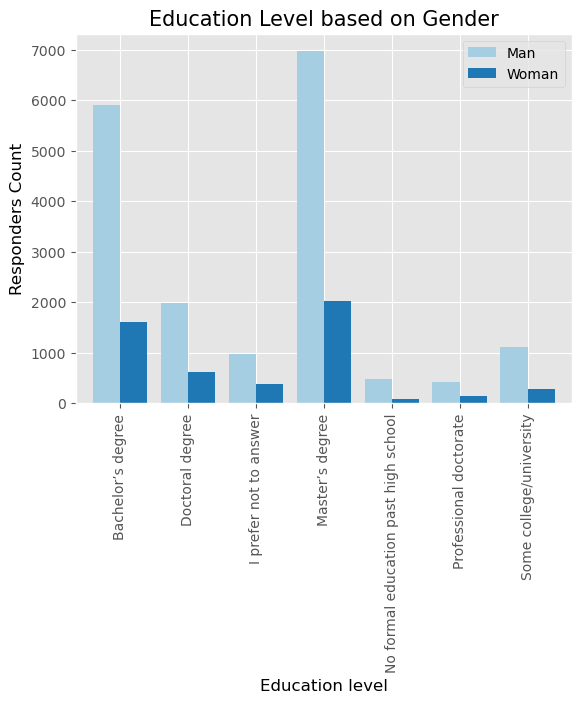

In [301]:
man_woman_ed.plot(kind = 'bar', color =colors_paired, width = 0.8)
plt.title('Education Level based on Gender', fontsize = 15)
plt.xlabel('Education level', color = 'black')
plt.ylabel('Responders Count', color = 'black')
plt.legend(['Man', 'Woman'])

From the above chart, we found that there is a big differnce between the education level of man and woman. <b>Man</b> seems to be <b>most educated</b>
compares to Woman.

<b>Q8-Programming or coding Experience</b>

Text(0, 0.5, 'Responder Count')

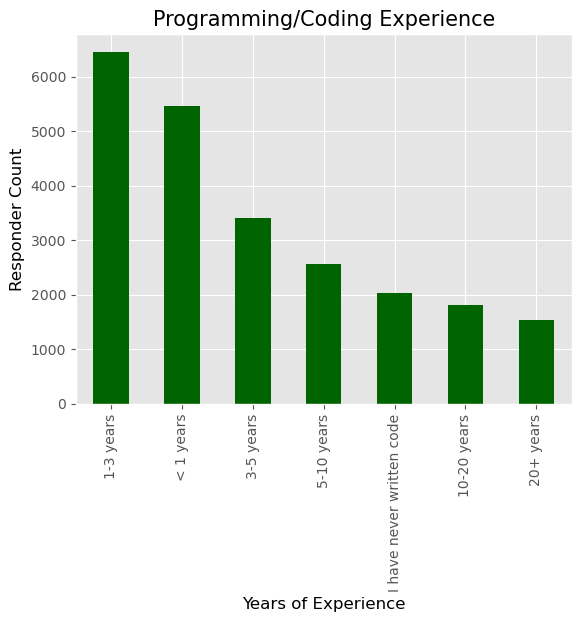

In [302]:
kaggle_df['programming_experience'].value_counts().plot(kind='bar', color = 'darkgreen')
plt.title('Programming/Coding Experience', fontsize = 15, color = 'black')
plt.xlabel('Years of Experience', color = 'black')
plt.ylabel('Responder Count', color = 'black')

<b>Most</b> of the people who participated in survey has <b>1-3 years</b> of experience.

<b>Q9-Popularity of languages based on Usage</b>

In [303]:
programming_lags = kaggle_df[['programming_langs_use_python',
'programming_langs_use_r',
'programming_langs_use_sql',
'programming_langs_use_c',
'programming_langs_use_c#',
'programming_langs_use_c++',
'programming_langs_use_java',
'programming_langs_use_javascript',
'programming_langs_use_bash',
'programming_langs_use_php',
'programming_langs_use_matlab',
'programming_langs_use_julia',
'programming_langs_use_go',
'programming_langs_use_none',
'programming_langs_use_other',]]

lang_count = []
lang_name = []
lang_usage = []


cols_count(programming_lags,lang_count,lang_name,lang_usage)  #use cols_count method

popular_langs = pd.DataFrame(lang_usage,lang_name)
popular_langs.reset_index(inplace = True)
popular_langs.columns = ['language_name', 'language_usage']
popular_langs_sort = popular_langs.sort_values('language_usage', ascending = False)
popular_langs_sort




,language_name,language_usage
0,Python,18653
2,SQL,9620
1,R,4571
5,C++,4549
6,Java,3862
3,C,3801
7,Javascript,3489
10,MATLAB,2441
8,Bash,1674
4,C#,1473


Text(0.5, 1.0, 'Language usage Trend ')

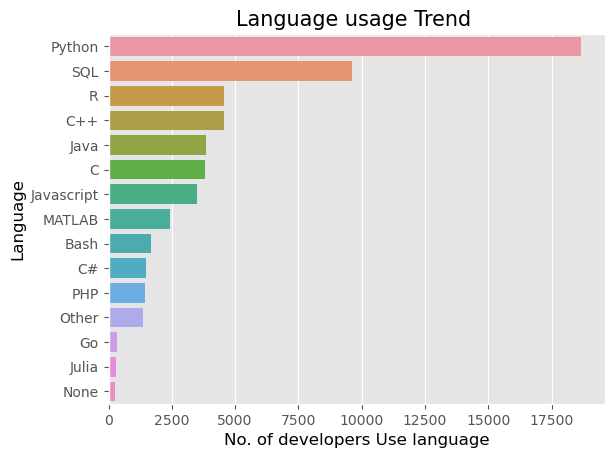

In [304]:
sns.barplot(data=popular_langs_sort, y="language_name", x = 'language_usage',orient = 'h')
plt.xlabel('No. of developers Use language', color = 'black')
plt.ylabel('Language', color = 'black')
plt.title('Language usage Trend ', fontsize = 15)


<b>Q10-Popularity of IDE's(Integrated Development Environment) based on Usage</b>

In [305]:
kaggle_df['ide_use_jupyterlab']    

0                NaN
1                NaN
2        JupyterLab 
3                NaN
4                NaN
            ...     
23992            NaN
23993            NaN
23994            NaN
23995            NaN
23996            NaN
Name: ide_use_jupyterlab, Length: 23996, dtype: object

As we can see in the column 'ide_use_jupyterlab' there are some 'nan' values so we have to replace these string values to 'np.nan'
because i am trying to get no.of unique values in idee's column using value_counts() methos. and if i don't remove these , method will count
'nan' values too. So after carefully e=reading data, we have sort out the columns containing'nan values and will replace these values 
with np.nan in the next step. We will use 'inplace = True' to change the existing dataframe.

In [306]:
kaggle_df['ide_use_jupyterlab'].replace('nan',np.nan,inplace = True)
kaggle_df['ide_use_rstudio_posit'].replace('nan',np.nan,inplace = True)
kaggle_df['ide_use_intellij'].replace('nan',np.nan,inplace = True)

After replacing, let's count the no.of values using our previously defined function 'count_cols'

In [307]:
code_editor = kaggle_df[['ide_use_jupyterlab',
'ide_use_rstudio_posit',
'ide_use_visual_studio',
'ide_use_visual_studio_code',
'ide_use_pycharm',
'ide_use_spyder',
'ide_use_notepad++',
'ide_use_sublime_text',
'ide_use_vim_emacs',
'ide_use_matlab',
'ide_use_jupyter_notebook',
'ide_use_intellij',
'ide_use_none',
'ide_use_other']]


ide_count = []
ide_name = []
ide_usage = []

cols_count(code_editor,ide_count,ide_name,ide_usage)  #use cols_count method

ide_count


[JupyterLab     4887
 Name: ide_use_jupyterlab, dtype: int64,
  RStudio     3824
 Name: ide_use_rstudio_posit, dtype: int64,
  Visual Studio     4416
 Name: ide_use_visual_studio, dtype: int64,
  Visual Studio Code (VSCode)     9976
 Name: ide_use_visual_studio_code, dtype: int64,
  PyCharm     6099
 Name: ide_use_pycharm, dtype: int64,
   Spyder      2880
 Name: ide_use_spyder, dtype: int64,
   Notepad++      3891
 Name: ide_use_notepad++, dtype: int64,
   Sublime Text      2218
 Name: ide_use_sublime_text, dtype: int64,
   Vim / Emacs      1448
 Name: ide_use_vim_emacs, dtype: int64,
  MATLAB     2302
 Name: ide_use_matlab, dtype: int64,
  Jupyter Notebook    13684
 Name: ide_use_jupyter_notebook, dtype: int64,
 IntelliJ    1612
 Name: ide_use_intellij, dtype: int64,
 None    409
 Name: ide_use_none, dtype: int64,
 Other    1474
 Name: ide_use_other, dtype: int64]

Now let's create a dataframe of the above values.

In [229]:
popular_ide = pd.DataFrame(ide_usage,ide_name)
popular_ide.reset_index(inplace = True)
popular_ide.columns = ['ide_name', 'ide_usage']
popular_ide_sort = popular_ide.sort_values('ide_usage', ascending = False)
popular_ide_sort


,ide_name,ide_usage
10,Jupyter Notebook,13684
3,Visual Studio Code (VSCode),9976
4,PyCharm,6099
0,JupyterLab,4887
2,Visual Studio,4416
6,Notepad++,3891
1,RStudio,3824
5,Spyder,2880
9,MATLAB,2302
7,Sublime Text,2218


As now, we have got the dataframe in descending order of values. Now. let's delete rows with 'none' and 'other' values in order to better 
represent our data through visualization. It would appear more appelaing and accurate.

In [233]:
popular_ide_sort.drop(labels = [12,13],axis = 0,inplace = True)

In [234]:
popular_ide_sort

,ide_name,ide_usage
10,Jupyter Notebook,13684
3,Visual Studio Code (VSCode),9976
4,PyCharm,6099
0,JupyterLab,4887
2,Visual Studio,4416
6,Notepad++,3891
1,RStudio,3824
5,Spyder,2880
9,MATLAB,2302
7,Sublime Text,2218


After the cleaning and formatting of data, we will visualize data.

In [249]:
fig = px.pie(popular_ide_sort, values='ide_usage', names='ide_name', title='Popular IDE \'s among developers')
fig.update_layout(title_font_size = 28, title_x = 0.4)
fig.show()

From the above pie chart, we conclude that <b>Jupyter Notebook </b> is most popular among developers followed by <b>Visual Studio Code
(VS Code)</b> 

<b>Q11-Job Title and Income of developers</b>

In [308]:
kaggle_df['job_title'].value_counts()

Data Scientist                                                      1929
Data Analyst (Business, Marketing, Financial, Quantitative, etc)    1538
Currently not employed                                              1432
Software Engineer                                                    980
Teacher / professor                                                  833
Manager (Program, Project, Operations, Executive-level, etc)         832
Other                                                                754
Research Scientist                                                   593
Machine Learning/ MLops Engineer                                     571
Engineer (non-software)                                              465
Data Engineer                                                        352
Statistician                                                         125
Data Architect                                                        95
Data Administrator                                 

In [250]:
# text = kaggle_df['job_title'].isnull().values
jobs = list()
for i in kaggle_df['job_title']:
    if i ==None:
         pass 
    else:
        jobs.append(i)
        
job_title = pd.DataFrame(Counter(jobs).keys(),Counter(jobs).values())
job_title.reset_index(inplace=True)
job_title.columns = ['count','job_title']
job_title

,count,job_title
0,1929,Data Scientist
1,980,Software Engineer
2,593,Research Scientist
3,754,Other
4,61,Developer Advocate
5,1538,"Data Analyst (Business, Marketing, Financial, ..."
6,352,Data Engineer
7,1432,Currently not employed
8,571,Machine Learning/ MLops Engineer
9,465,Engineer (non-software)


In [257]:
job_title.iloc[5,1] = "Data Analyst"
job_title.iloc[12,1] = "Manager"
job_title.iloc[8,1] = "ML Engineer"

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

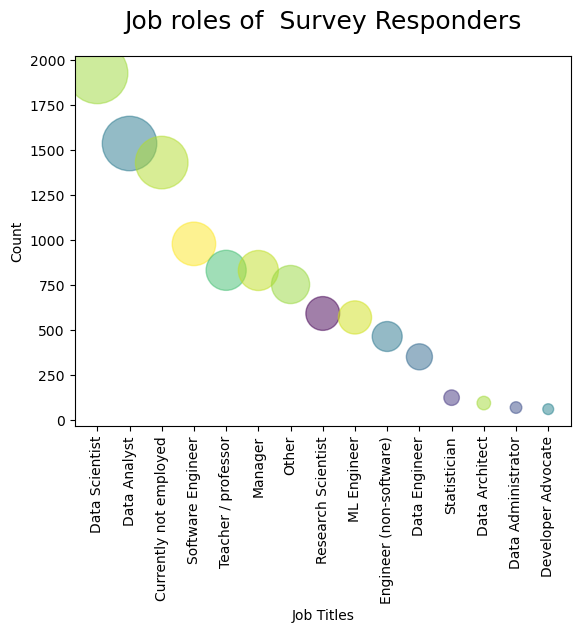

In [279]:
job_title_sort = job_title.sort_values('count', ascending =False)
plt.scatter(job_title_sort['job_title'],job_title_sort['count'],c= np.random.rand(15), s =job_title_sort['count'], alpha =0.5 )
plt.title('Job roles of  Survey Responders', fontsize =18, pad=20)
plt.xlabel('Job Titles', color = 'black')
plt.ylabel('Count', color = 'black')
plt.xticks(rotation = 'vertical')

From above Scatter Plot, 'Data Scientist' is the most popular job role following 'Data Analyst'.

<b> Maximum and Minimum average income of each profession</b>

In [309]:
job_income = kaggle_df.groupby('job_title').agg(max_avg_income = ('yearly_income_upper','mean'),
                                                min_avg_income = ('yearly_income_lower','mean'))


job_income.fillna({'max_avg_income':0, 'min_avg_income':0}, inplace=True)
# 
job_income.reset_index(inplace = True)
job_income.iloc[[2,9],0] = ['Data Analyst', 'Manager']

job_income.style.set_caption("Average Maximum and Minimum Salary (US $)").format(precision=2).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'black'),
        ('font-size', '21px'),
        ('text-align', 'right')
    ]
}])

,job_title,max_avg_income,min_avg_income
0,Currently not employed,0.00,0.00
1,Data Administrator,26215.42,20902.99
2,Data Analyst,35046.41,27470.74
3,Data Architect,106309.98,79006.10
4,Data Engineer,54958.93,42142.86
5,Data Scientist,74910.23,58111.70
6,Developer Advocate,82971.22,59092.59
7,Engineer (non-software),37690.28,29025.42
8,Machine Learning/ MLops Engineer,68470.12,51542.83
9,Manager,110988.89,81205.53


<b> Q-12 Media Platforms</b>

In [82]:
media = kaggle_df[['fav_media_twitter',
'fav_media_email_newsletter',
'fav_media_reddit',
'fav_media_kaggle',
'fav_media_course_forums',
'fav_media_youtube',
'fav_media_podcasts',
'fav_media_blogs',
'fav_media_journal',
'fav_media_slack']]

media_count = []
media_name = []
media_usage = []


cols_count(media,media_count,media_name,media_usage)  #use cols_count method

popular_media = pd.DataFrame(media_usage,media_name)
popular_media.reset_index(inplace = True)
popular_media.columns = ['media_name', 'media_usage']
popular_media



,media_name,media_usage
0,Twitter (data science influencers),3995
1,"Email newsletters (Data Elixir, O'Reilly Data ...",3787
2,"Reddit (r/machinelearning, etc)",2678
3,"Kaggle (notebooks, forums, etc)",11181
4,"Course Forums (forums.fast.ai, Coursera forums...",4006
5,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",11957
6,"Podcasts (Chai Time Data Science, O’Reilly Dat...",2120
7,"Blogs (Towards Data Science, Analytics Vidhya,...",7766
8,"Journal Publications (peer-reviewed journals, ...",3804
9,"Slack Communities (ods.ai, kagglenoobs, etc)",1726


Even though we have created a dataframe, but let's modify values little bit to create a word cloud from this. 

In [83]:
popular_media.iloc[:,0]=['Twitter','Email newletters','Reddit','Kaggle','Course Forums','YouTube',
                        'Podcasts','Blogs','Journal Publications','Slack Communities']

popular_media_sort = popular_media.sort_values('media_usage', ascending = False)
popular_media_sort



,media_name,media_usage
5,YouTube,11957
3,Kaggle,11181
7,Blogs,7766
4,Course Forums,4006
0,Twitter,3995
8,Journal Publications,3804
1,Email newletters,3787
2,Reddit,2678
6,Podcasts,2120
9,Slack Communities,1726


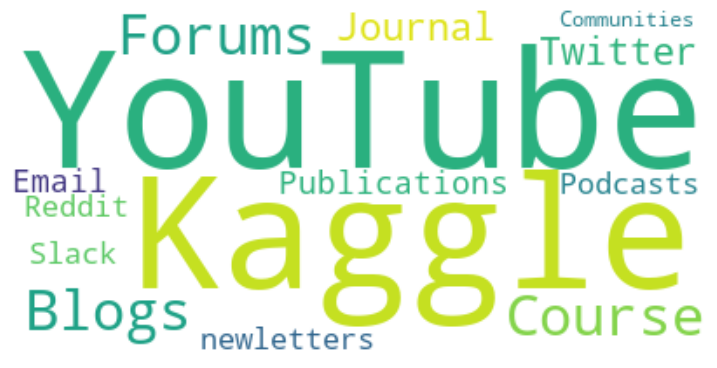

In [315]:
text = " ".join(i for i in popular_media_sort.media_name)
stopwords = set(STOPWORDS)  #to exclude words
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(9,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

As from above chart , we can see that <b> You Tube </b> and <b> kaggle</b> are the most used Media Platforms among Proffesionals and students.

<h1> Key Findings : </h1>

- To Respond all survey questions , average time is 2 hours 48 minutes
- Most of the Respondents are in age group of 18-21
- There is a large gap betwwen the ratio of Men(77.56%) and women(22.44%) in data industry.
- 8791 Respondents are from India followed by USA i.e. 2920 Respondents
- Online Courses and Youtube are the most Popular Platforms for Data Science Study.
- Men has highest number in terms of  education level.
- 'Managers' have maximum yearly income with average of 110988 followed by 'Data Architects' who has average of 106309

<h1> Recommendations: </h1>

After exploring the survey responses dataset, these recommendations can be made for  aspiring or working Data Analyst, Scientist and Architects and other proffesionals:

- Corsera and Kaggle Learn courses are most popular platforms for online courses. You can also follow youtube tutorials to learn data science.
- Python, SQl and R are the most trending languages. So, its recommended to learn these languages whether you are someone who is looking to break into industry or existing proffesionals looking to upskill in their careers.
- Jupyter Notebooks and VS Code are popular IDE(Integrated Deevelopment Environment). Learning how to develop into these environment can be really beneficial in future.

<h1> References :</h1> <br>
Some of the resources that i have used for this analysis:
    
   - [Matplotlib documentation](https://matplotlib.org/)
   - [Seaborn documentation](https://seaborn.pydata.org/)
   - [Plotly documentation](https://plotly.com/graphing-libraries/)
   - [Pandas documentation](https://pandas.pydata.org/)
   - [numpy documentation](https://numpy.org/doc/)
 
    